# k近傍法

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [2]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

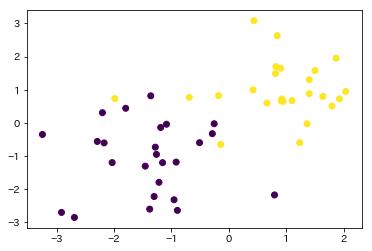

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

## 学習

陽に訓練ステップはない

## 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

In [4]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [5]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

X_train = x_train
X_test = xx
k = 3

y_pred = np.empty(len(X_test), dtype=y_train.dtype)
for i, x in enumerate(X_test):
    distances = distance(x, X_train)
    nearest_index = distances.argsort()[:k]
    mode, _ = stats.mode(y_train[nearest_index])
    y_pred[i] = mode

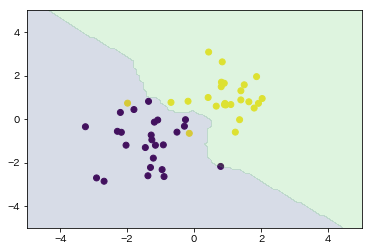

In [6]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))